# Sign Language Image Classification CNN (Deep Learning)


In [ ]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os, time
import pandas as pd

# Our new Deep Learning imports
import tensorflow as tf
from tensorflow import keras

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()

## Part 1.  Loading, displaying data and initial model training
### 1.1 Load the data

In [ ]:
# Due to the file size limitation on GitHub, please download sign_mnist_train.csv in Google Drive: https://drive.google.com/file/d/1pn5To3RC5DPcIjU1zVSdfZFQyGqMs6Tc/view?usp=share_link.
# All other dataset can be download on GitHub repository.
train_path = "AmericanSignLanguageImageData/sign_mnist_train.csv"
test_path = "AmericanSignLanguageImageData/sign_mnist_test.csv"
sign_train = pd.read_csv(train_path)
sign_test_full = pd.read_csv(test_path)

### 1.2 Display the data

In [3]:
# display the training set
print(sign_train.info()) 
sign_train.head()

# training set has 27455 samples, has 1 label and 1024 features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 1025 entries, label to pixel1024
dtypes: int64(1025)
memory usage: 214.7 MB
None


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,157,157,157,157,157,158,158,...,149,163,175,175,175,175,175,149,149,149
2,2,187,188,188,188,188,188,188,188,188,...,202,201,200,199,199,199,198,195,195,195
3,2,211,211,212,212,212,212,212,212,211,...,235,234,233,231,230,229,229,229,229,163
4,13,164,167,170,172,176,179,180,184,185,...,133,163,163,163,164,179,179,179,179,179


In [4]:
sign_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,149.123329,152.362083,155.133819,157.835622,160.090257,161.908359,163.544163,165.115826,...,176.100091,175.977527,175.687853,175.208013,174.757276,174.309598,171.826261,168.567328,164.679330,159.824731
std,7.287552,41.358555,38.871181,37.146141,35.720759,34.194977,33.093305,32.548073,31.932698,31.272083,...,55.332441,56.620297,57.363062,57.593339,58.031301,58.438999,59.179393,60.430702,62.184793,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,131.000000,134.000000,137.000000,140.000000,143.000000,145.000000,147.000000,...,150.000000,152.000000,155.000000,155.000000,156.000000,157.000000,154.000000,147.000000,139.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,166.000000,167.000000,...,191.000000,192.000000,192.000000,192.000000,191.000000,191.000000,189.000000,187.000000,185.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,180.000000,181.000000,182.000000,183.000000,185.000000,185.000000,...,214.000000,214.000000,214.000000,213.000000,213.000000,212.000000,210.000000,208.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [5]:
# display the test set 
print(sign_test_full.info())
sign_test_full.head()

# test set has 7172 samples, has 1 label and 1024 features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 1025 entries, label to pixel1024
dtypes: int64(1025)
memory usage: 56.1 MB
None


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,6,149,149,150,150,150,151,151,151,151,...,148,148,127,112,120,120,120,120,120,107
1,5,126,128,131,132,133,134,135,135,136,...,194,194,194,186,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,242,242,242,230,230,227,226,225,224,222
3,0,203,205,207,207,207,209,210,210,210,...,253,253,253,253,253,255,255,255,255,255
4,3,188,191,193,195,199,201,202,203,203,...,64,64,64,49,49,53,53,53,53,53


In [6]:
sign_test_full.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.00000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,151.072365,154.107501,156.803263,159.351506,161.647239,163.752649,165.64696,167.254741,...,174.151840,174.700363,173.101366,172.863776,172.040714,170.141662,166.806470,163.462772,159.724484,154.776771
std,7.446712,43.593144,40.941795,39.342232,37.890328,36.445585,34.945122,33.815146,32.62428,31.609579,...,57.451508,58.388804,60.188607,60.622893,61.262702,61.748066,63.302812,64.300947,66.007709,68.285148
min,0.000000,0.000000,0.000000,8.000000,17.000000,19.000000,35.000000,27.000000,20.00000,28.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,131.000000,135.000000,138.000000,142.000000,144.000000,146.00000,148.000000,...,141.000000,147.000000,144.000000,148.000000,148.000000,143.000000,136.000000,127.000000,118.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,167.000000,168.00000,170.000000,...,190.000000,191.000000,191.000000,190.000000,189.000000,188.000000,187.000000,185.000000,182.000000,179.000000
75%,18.000000,178.000000,180.000000,181.000000,182.000000,184.000000,185.000000,187.000000,187.00000,188.000000,...,215.000000,215.000000,215.000000,214.000000,214.000000,213.000000,211.000000,208.000000,207.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [7]:
# Extract feature names and label name
feature_names = sign_train.columns[1:].tolist()
label_name = sign_train.columns[0]

# Split training data into X and y
X_train = sign_train[feature_names]
y_train = sign_train[label_name]

# Split test data into X and y
X_test_full = sign_test_full[feature_names]
y_test_full = sign_test_full[label_name]

### 1.3 Display a sample of each letter

In [8]:
# Check if training set and test set have the same labels categories

# Extract labels categories
train_labels = y_train.unique()
train_labels.sort()
test_labels = y_test_full.unique()
test_labels.sort()

if set(train_labels) == set(test_labels):
    print("The training and testing sets have the same label categories.")
    print("Number of unique labels in each set:", len(test_labels))
    print("Unique labels in each set:", test_labels)
else:
    print("The training and testing sets have different label categories.")
    


The training and testing sets have the same label categories.
Number of unique labels in each set: 24
Unique labels in each set: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


A sample of each letter on the training set:


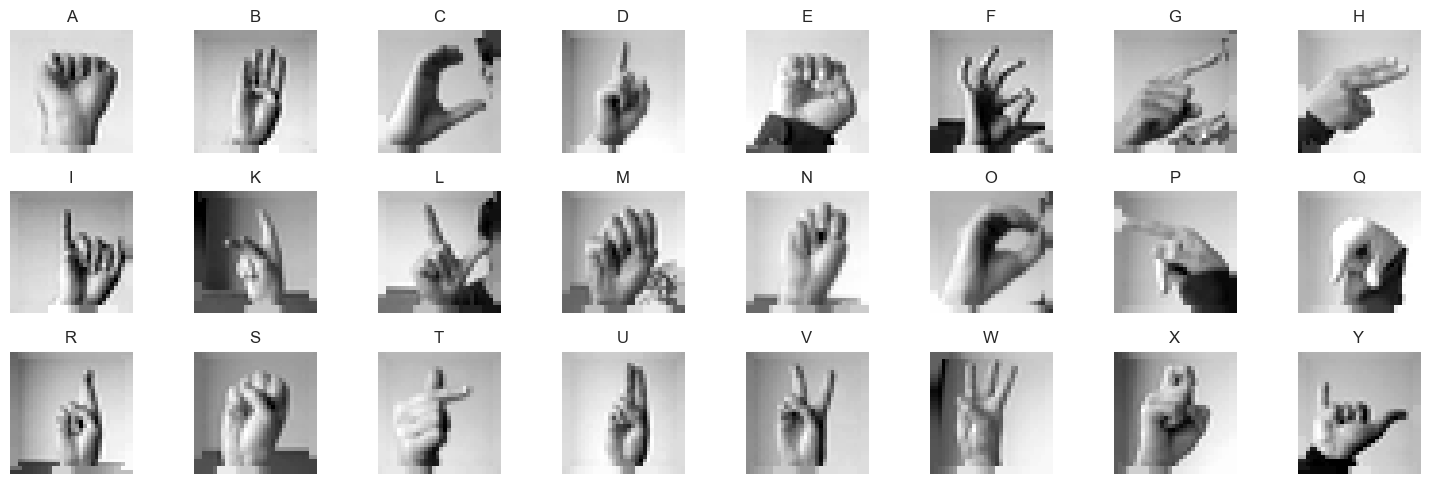

In [9]:
# define a function to display the letter samples
def plot_samples(X, y, labels):
    fig, axes = plt.subplots(3, 8, figsize=(15, 5))
    axes = axes.flatten()
    for label, ax in zip(labels, axes):
        # Extract sample and reshape to 32x32 image as we have 1024 features
        sample = X[y == label].iloc[0].values.reshape(32, 32)  
        ax.imshow(sample, cmap='gray')
        # convert 24 numbers to letter 
        # a label (0-25) as a one-to-one map for each alphabetic letter A-Z (no cases for 9=J or 25=Z because of gesture motions))
        ax.set_title(chr(label + 65)) 
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print("A sample of each letter on the training set:")
plot_samples(X_train, y_train, train_labels)

A sample of each letter on the test set:


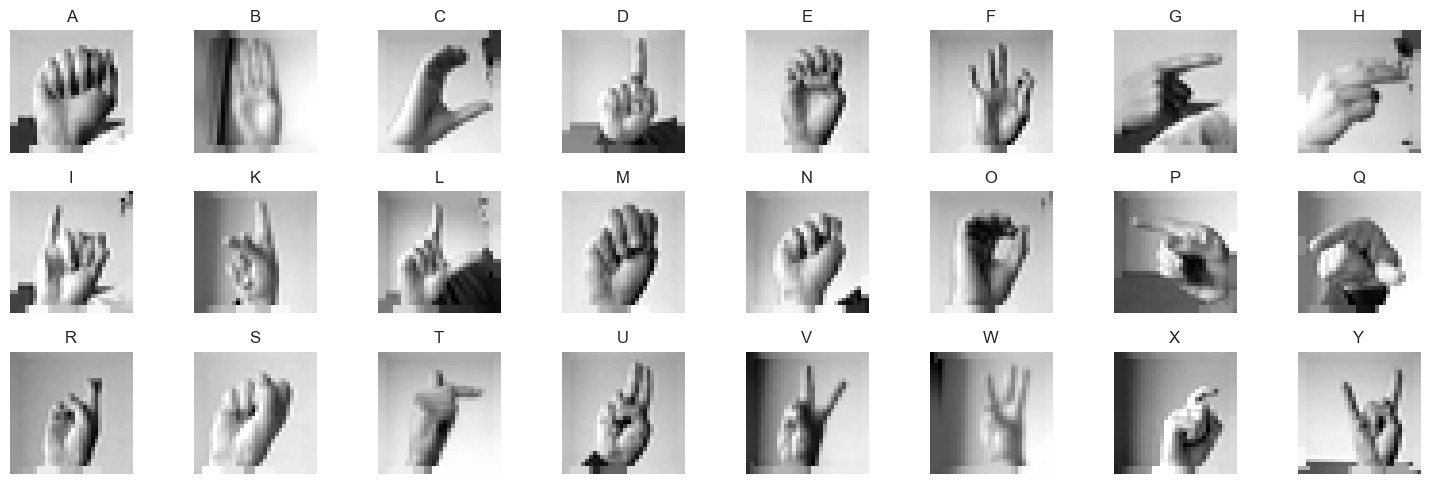

In [10]:
print("A sample of each letter on the test set:")
plot_samples(X_test_full, y_test_full, train_labels)

In [11]:
# Fix the labels to have a continuous range from 0 to 23 in the original columns
y_train = y_train.apply(lambda x: x - 1 if x > 9 else x)
y_test_full = y_test_full.apply(lambda x: x - 1 if x > 9 else x)

# Sort the labels
sorted_y_train = sorted(y_train.unique())
sorted_y_test_full = sorted(y_test_full.unique())

# Verify the new labels
print("Sorted and fixed training labels:", sorted_y_train)
print("Sorted and fixed test labels:", sorted_y_test_full)

Sorted and fixed training labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Sorted and fixed test labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


### 1.4 Split data and pre-processing

In [12]:
from sklearn.model_selection import train_test_split

# Split the full test data into test and validation sets using stratified sampling
X_test, X_valid, y_test, y_valid = train_test_split(X_test_full, y_test_full, test_size=0.2, stratify=y_test_full, random_state=27)

# Convert to numpy array and reshape the data
X_train = X_train.values.reshape(-1, 32, 32, 1)
X_valid = X_valid.values.reshape(-1, 32, 32, 1)
X_test = X_test.values.reshape(-1, 32, 32, 1)

print(f"The shape of X_train is: {X_train.shape}.")
print(f"The shape of y_train is: {y_train.shape}.")
print(f"The shape of X_valid is: {X_valid.shape}.")
print(f"The shape of y_valid is: {y_valid.shape}.")
print(f"The shape of X_test is: {X_test.shape}.")
print(f"The shape of y_test is: {y_test.shape}.")

The shape of X_train is: (27455, 32, 32, 1).
The shape of y_train is: (27455,).
The shape of X_valid is: (1435, 32, 32, 1).
The shape of y_valid is: (1435,).
The shape of X_test is: (5737, 32, 32, 1).
The shape of y_test is: (5737,).


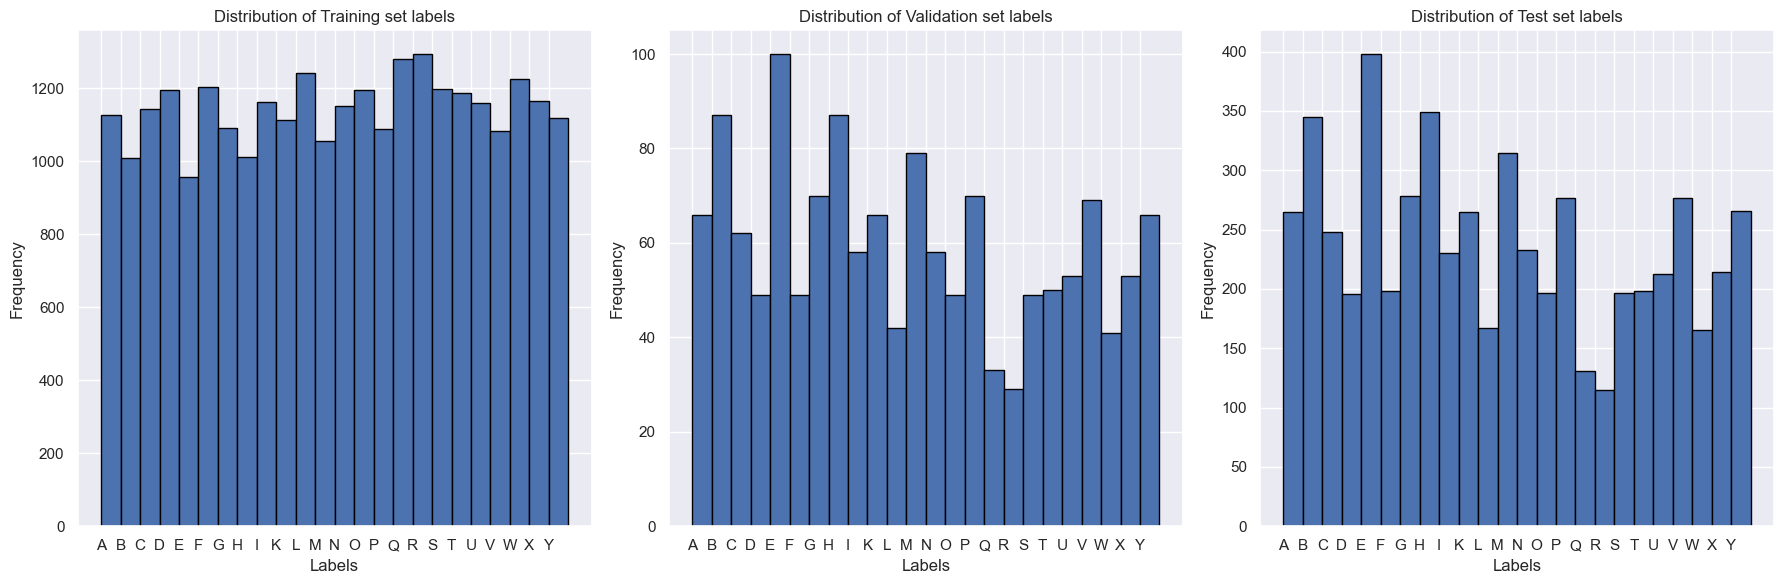

In [13]:
# Let's look at the distribution of labels in the training, validation and test sets.
import matplotlib.pyplot as plt

# Define a mapping from numeric labels to letters
label_map = {i: chr(i + 65) for i in range(9)}
label_map.update({i: chr(i + 65 + 1) for i in range(9, 24)})

# Define a function to plot the label distribution
def plot_label_distribution(labels, title, ax):
    ax.hist(labels, bins=range(25), edgecolor='black') 
    ax.set_title(f'Distribution of {title} set labels')
    ax.set_xlabel('Labels')
    ax.set_ylabel('Frequency')
    ax.set_xticks(range(24))
    ax.set_xticklabels([label_map[i] for i in range(24)])

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting the histograms for 3 data sets
plot_label_distribution(y_train, 'Training', axes[0])
plot_label_distribution(y_valid, 'Validation', axes[1])
plot_label_distribution(y_test, 'Test', axes[2])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Distribution on the training set is balanced, but are little bit imbalanced on the validation and test set.

In [14]:
# Define a function to check the range of feature values
def check_feature_range(X):
    min_val = X.min().min()
    max_val = X.max().max()
    return min_val, max_val

In [15]:
# Check range for 3 data sets
min_val, max_val = check_feature_range(X_train)
print(f"Feature value range on training set: {min_val} to {max_val}")
min_val, max_val = check_feature_range(X_valid)
print(f"Feature value range on validation set: {min_val} to {max_val}")
min_val, max_val = check_feature_range(X_test)
print(f"Feature value range on test set: {min_val} to {max_val}")

Feature value range on training set: 0 to 255
Feature value range on validation set: 0 to 255
Feature value range on test set: 0 to 255


In [16]:
# Define a rescale function to scale the data appropriately after know the range of feature values
def rescale(X):
    return X / 255

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Define the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('rescale', FunctionTransformer(rescale, validate=False))
])

# Preprocess the data
X_train = preprocessing_pipeline.fit_transform(X_train)
X_valid = preprocessing_pipeline.transform(X_valid)
X_test = preprocessing_pipeline.transform(X_test)

### 1.5 Initial model training

In [18]:
import random
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix


def set_seed(seed=27):
    np.random.seed(27)
    random.seed(27)
    tf.random.set_seed(27)

In [19]:
# Set the parameters
# Set the size of hidden layers
hiddensizes = [16, 32, 16] 

# Set the activation function to be used by hidden layers
actfn = "elu" 

# Optimizer and learning rate
optimizer = keras.optimizers.legacy.SGD 
learning_rate = 0.01  

# Set size of batch and number of epochs
batch_size = 32 
n_epochs = 20

# Set Early stopping callback to reduce overfitting
# Using val_accuracy as the monitor
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [20]:
# Define a function to evaluate the model, print the results, and plot individual accuracies
def evaluate_model(model, X_valid, y_valid, label_map=label_map):
    # Use validation set to do predictions and provide unbiased results
    y_pred = model.predict(X_valid)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Accuracy for each individual letter
    labels = np.unique(y_valid)
    individual_accuracies = {label: accuracy_score(y_valid[y_valid == label], y_pred_classes[y_valid == label]) for label in labels}
    
    # Overall mean accuracy (the mean over the values from the individual letters)
    accuracies = list(individual_accuracies.values())
    overall_mean_accuracy = np.mean(accuracies)
    
    # Calculate unbiased median accuracy (the median value from a set of individual accuracy of each class)
    unbiased_median_accuracy = np.median(accuracies)
    
    # Letter with the highest individual accuracy
    highest_acc_letter = max(individual_accuracies, key=individual_accuracies.get)
    highest_acc = individual_accuracies[highest_acc_letter]

    # Letter with the lowest individual accuracy
    lowest_acc_letter = min(individual_accuracies, key=individual_accuracies.get)
    lowest_acc = individual_accuracies[lowest_acc_letter]

    # Normalised confusion matrix
    cm = confusion_matrix(y_valid, y_pred_classes, normalize = 'true')
    
    # Identify the three most common types of errors based on the normalized confusion matrix
    errors = []
    for i in range(len(labels)):
        for j in range(len(labels)):
            if i != j: # Ignore correct classifications
                errors.append((cm[i, j], label_map[labels[i]], label_map[labels[j]]))
                
    # Sort errors by proportion (from most to least common) and select the top three
    errors = sorted(errors, reverse=True)[:3]

   # Print results
    total_params = model.count_params()
    print(f"Model Total Parameters: {total_params}")
    print(f"Unbiased median accuracy: {unbiased_median_accuracy * 100:.2f}%")
    print(f"Highest individual accuracy: Letter {label_map[highest_acc_letter]} with accuracy {highest_acc * 100:.2f}%")
    print(f"Lowest individual accuracy: Letter {label_map[lowest_acc_letter]} with accuracy {lowest_acc * 100:.2f}%")
    print("Three most common types of errors:")
    for proportion, actual, predicted in errors:
        print(f"  - '{actual}' was incorrectly classified as '{predicted}' with a proportion of {proportion:.3f}")
    print(f"Overall mean accuracy: {overall_mean_accuracy * 100:.2f}%")
    print("Individual accuracies:", ', '.join([f"{label_map[k]}: {v * 100:.2f}%" for k, v in individual_accuracies.items()]))

    # Plot individual accuracies as a bar chart
    plt.figure(figsize=(6, 4))
    plt.bar([label_map[k] for k in individual_accuracies.keys()], individual_accuracies.values(), color='cornflowerblue')
    plt.xlabel('Letters')
    plt.ylabel('Accuracy')
    plt.title('Individual Letter Accuracies')
    plt.ylim(0, 1)  # Accuracy is a value between 0 and 1
    plt.grid(True)
    plt.show()

    return {
        'unbiased_median_accuracy': unbiased_median_accuracy,
        'highest_accuracy': highest_acc,
        'highest_accuracy_letter': highest_acc_letter,
        'lowest_accuracy': lowest_acc,
        'lowest_accuracy_letter': lowest_acc_letter,
        'overall_mean_accuracy': overall_mean_accuracy,
        'individual_accuracies': individual_accuracies,
        'error_types': errors,
        'confusion_matrix': cm,
        'total_params': total_params
    }

In [21]:
# Define a function to train and evaluate a model
def do_all(hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size, model_factory, X_valid, y_valid, further_callbacks=[]):
    # Select callbacks based on the input parameter
    if further_callbacks:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
        
    # Create the model and train it
    model = model_factory(hiddensizes, actfn, optimizer, learning_rate)
    history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_valid, y_valid), callbacks=callbacks, verbose=0)
    print(f"hiddensizes: {hiddensizes}, actfn: {actfn}, optimizer: {optimizer.__name__.split('.')[-1]}, lr: {learning_rate}, batch_size: {batch_size}")
    results = evaluate_model(model, X_valid, y_valid)
    
    # Return the required metrics for hyperparameter tuning
    return results['unbiased_median_accuracy'], results['lowest_accuracy'], history, model


In [22]:
# Define a function to plot learning curves
def plot_history(history, title):
    plt.figure(figsize=(6, 4))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0, n), history.history['accuracy'], color='orange')
    plt.plot(np.arange(0, n), history.history['loss'], 'b')
    plt.plot(np.arange(0, n) + 0.5, history.history['val_accuracy'], 'r')
    plt.plot(np.arange(0, n) + 0.5, history.history['val_loss'], 'g')
    plt.legend(['Train Acc', 'Train Loss', 'Val Acc', 'Val Loss'])
    plt.title(title)
    plt.grid(True)
    plt.show()

#### 1.5.1 Implement a simple dense neural network model

In [23]:
# Build a simple DNN (using dense layers)
def model_dense_factory(hiddensizes, actfn, optimizer, learning_rate):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = [32, 32, 1]))  # input_shape = [32, 32, 1])
    for n in hiddensizes:
        model.add(keras.layers.Dense(n, activation = actfn))
    
    # Output layer for classification with 24 classes
    model.add(keras.layers.Dense(24, activation = "softmax"))
    # Use accuracy as the metric
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learning_rate), metrics=["accuracy"])
    return model

2024-08-14 19:32:30.988753: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


hiddensizes: [16, 32, 16], actfn: elu, optimizer: SGD, lr: 0.01, batch_size: 32
45/45 [==============================] - 0s 319us/step
Model Total Parameters: 17880
Unbiased median accuracy: 66.90%
Highest individual accuracy: Letter Q with accuracy 87.88%
Lowest individual accuracy: Letter T with accuracy 12.00%
Three most common types of errors:
  - 'M' was incorrectly classified as 'N' with a proportion of 0.532
  - 'K' was incorrectly classified as 'U' with a proportion of 0.439
  - 'T' was incorrectly classified as 'X' with a proportion of 0.380
Overall mean accuracy: 57.97%
Individual accuracies: A: 66.67%, B: 78.16%, C: 56.45%, D: 53.06%, E: 72.00%, F: 77.55%, G: 51.43%, H: 71.26%, I: 70.69%, K: 16.67%, L: 45.24%, M: 17.72%, N: 68.97%, O: 48.98%, P: 67.14%, Q: 87.88%, R: 72.41%, S: 24.49%, T: 12.00%, U: 79.25%, V: 55.07%, W: 70.73%, X: 77.36%, Y: 50.00%


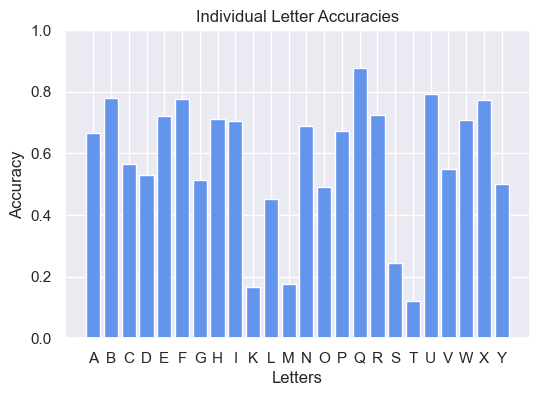

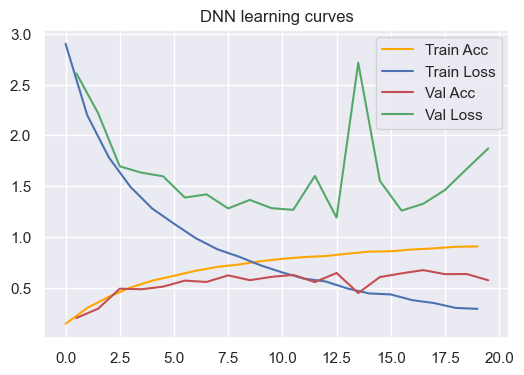

In [24]:
set_seed(seed=27)

# Train and evaluate the DNN model
unbiased_median_acc_dnn, min_acc_dnn, history_dnn, model_dnn = do_all(
    hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size, model_dense_factory, X_valid, y_valid)

# Plot learning curve for DNN
plot_history(history_dnn, "DNN learning curves")

We can see the DNN baseline model dosen't meet the client requirement. I will try CNN model and do some hyperparameter optimisation to find better models.

## Part 2. Model Optimisation

In this section, I use unbiased median accuracy and the lowest individual accuracy as key metrics for model selection. If the best values for these metrics differ, I prioritise the model with the highest lowest individual accuracy because I find that median accuracy usually meets the client’s requirements, whereas the lowest individual accuracy often does not.


In [25]:
# Set the parameters for the DNN model
original_hiddensizes = [16, 32, 16] 
actfn = "elu" 
optimizer = keras.optimizers.legacy.SGD 
learning_rate = 0.01  
batch_size = 32 

In [26]:
# Define the following functions to enhance the simplicity and maintainability of my code.
# Function to train and evaluate the model
def evaluate_hyper(model, X_valid, y_valid, label_map=label_map):
    y_pred = model.predict(X_valid)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Accuracy for each letter
    labels = np.unique(y_valid)
    individual_accuracies = {label: accuracy_score(y_valid[y_valid == label], y_pred_classes[y_valid == label]) for label in labels}
    
    # Unbiased median accuracy
    unbiased_median_accuracy = np.median(list(individual_accuracies.values())) 
    
    # Letter with the lowest individual accuracy
    lowest_acc = min(individual_accuracies.values())
    
    # Calculate the total number of parameters
    total_params = model.count_params()
    
    return unbiased_median_accuracy, lowest_acc, total_params

In [27]:
# Define a function to train and evaluate a model
def do_all_update(hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size, model_factory, X_valid, y_valid, further_callbacks=[]):
    callbacks = further_callbacks if further_callbacks else [early_stopping_cb]
    model = model_factory(hiddensizes, actfn, optimizer, learning_rate)
    history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_valid, y_valid), callbacks=callbacks, verbose=0)
    
    unbiased_median_accuracy, lowest_acc, total_params = evaluate_hyper(model, X_valid, y_valid)
    
    return unbiased_median_accuracy, lowest_acc, history, total_params


In [28]:
# Define a function to display the results of hyperparameter optimisation
def plot_results(results, title, x_label):
    results = np.array(results, dtype=object)
    param = [str(p) for p in results[:, 0]]
    median_acc = results[:, 1].astype(float)
    min_acc = results[:, 2].astype(float)
    
    # Plot median and lowest accuracy
    plt.figure(figsize=(6, 4))
    plt.plot(param, median_acc, 'r-', label='Median Accuracy')
    plt.plot(param, median_acc, 'ro')
    plt.plot(param, min_acc, 'b-', label='Minimum Accuracy') # Use 'Minmimum accuracy' to avoid 'the highest lowest accuracy' expression
    plt.plot(param, min_acc, 'bo')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Validation Accuracy')
    plt.legend()
    
    # Find and display the parameter with the highest median and lowest accuracy
    max_median_acc_index = np.argmax(median_acc)
    max_min_acc_index = np.argmax(min_acc)
    
    max_median_acc_param = param[max_median_acc_index]
    max_median_acc_value = median_acc[max_median_acc_index]
    max_min_acc_param = param[max_min_acc_index]
    max_min_acc_value = min_acc[max_min_acc_index]
    
    plt.show()
    
    print(f"The highest median accuracy is {max_median_acc_value* 100:.2f}% with {x_label} = {max_median_acc_param}.")
    print(f"The highest minimum accuracy is {max_min_acc_value* 100:.2f}% with {x_label} = {max_min_acc_param}.")
    

In [29]:
# Define a function to plot learning curves
def plot_history(history, title):
    plt.plot(history.history['accuracy'], color='orange')
    plt.plot(history.history['loss'], 'b')
    plt.plot(history.history['val_accuracy'], 'r')
    plt.plot(history.history['val_loss'], 'g')
    plt.legend(['Train Acc', 'Train Loss', 'Val Acc', 'Val Loss'])
    plt.title(title)
    plt.grid(True)

In [30]:
# Define a function to do hyperparameters optimisation
def optimize_parameter(param_name, param_values, model_factory, X_train, y_train, X_valid, y_valid, 
                       hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size):
    results = []
    plt.figure(figsize=(16, 4))

    for idx, param_value in enumerate(param_values):
        hiddensizes = original_hiddensizes
        
        # Update the parameter based on its name
        if param_name == 'learning_rate':
            learning_rate = param_value
        elif param_name == 'optimizer':
            optimizer = param_value[0]
            param_value = param_value[1]  # For display
        elif param_name == 'hiddensizes':
            hiddensizes = param_value
        elif param_name == 'number of hidden layers':
            hiddensizes = hiddensizes[:param_value]
        elif param_name == 'batch_size':
            batch_size = param_value
        elif param_name == 'actfn':
            actfn = param_value

        # Train and evaluate the model with the updated hyperparameter
        median_acc, min_acc, history, total_params = do_all_update(
            hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size, 
            model_factory, X_valid, y_valid
        )

        results.append([param_value, median_acc, min_acc])
        
        # Plot the learning curve for current parameter value
        plt.subplot(1, len(param_values), idx + 1)
        plot_history(history, f'{param_name}: {param_value}')
        
        # Print the current parameter and performance
        print(f"Total params: {total_params}, hiddensizes: {hiddensizes}, actfn: {actfn}, "
              f"optimizer: {optimizer.__name__.split('.')[-1]}, learning rate: {learning_rate}, "
              f"batch size: {batch_size}")
        print(f"{param_name}: {param_value}, Unbiased Median Accuracy: {median_acc * 100:.2f}%, "
              f"Lowest Accuracy: {min_acc * 100:.2f}%")

    plt.tight_layout()
    plt.show()

    # Display the final results for all parameter values
    plot_results(results, f'Accuracy vs {param_name}', param_name)

    return results

### 2.1 DNN model optimisation

#### 2.1.1 Learning rate optimisation

45/45 [==============================] - 0s 312us/step
Total params: 17880, hiddensizes: [16, 32, 16], actfn: elu, optimizer: SGD, learning rate: 1.0, batch size: 32
learning_rate: 1.0, Unbiased Median Accuracy: 0.00%, Lowest Accuracy: 0.00%
45/45 [==============================] - 0s 316us/step
Total params: 17880, hiddensizes: [16, 32, 16], actfn: elu, optimizer: SGD, learning rate: 0.1, batch size: 32
learning_rate: 0.1, Unbiased Median Accuracy: 65.18%, Lowest Accuracy: 24.49%
45/45 [==============================] - 0s 310us/step
Total params: 17880, hiddensizes: [16, 32, 16], actfn: elu, optimizer: SGD, learning rate: 0.01, batch size: 32
learning_rate: 0.01, Unbiased Median Accuracy: 69.68%, Lowest Accuracy: 36.36%
45/45 [==============================] - 0s 284us/step
Total params: 17880, hiddensizes: [16, 32, 16], actfn: elu, optimizer: SGD, learning rate: 0.001, batch size: 32
learning_rate: 0.001, Unbiased Median Accuracy: 45.61%, Lowest Accuracy: 1.45%


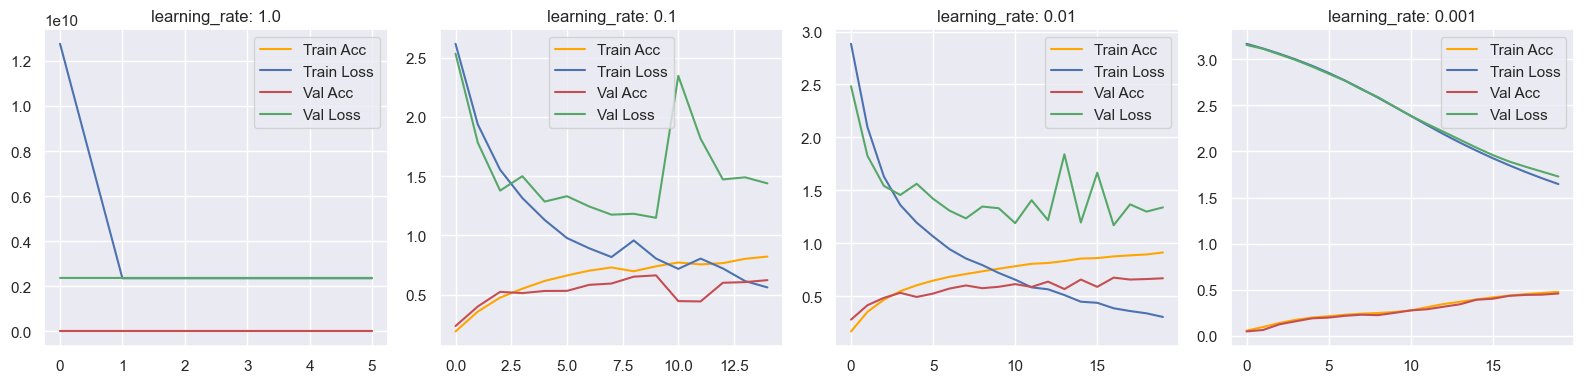

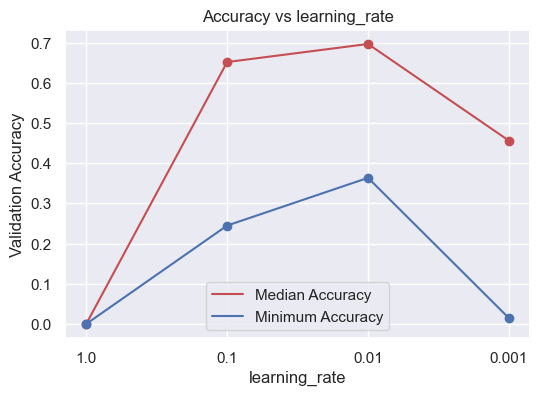

The highest median accuracy is 69.68% with learning_rate = 0.01.
The highest minimum accuracy is 36.36% with learning_rate = 0.01.


In [31]:
set_seed(seed=27)
# try different learning rate
learning_rates = [1.0, 0.1, 0.01, 0.001]
# train and display the learning rate optimisation results
lr_results = optimize_parameter('learning_rate', learning_rates, model_dense_factory, X_train, y_train, X_valid, y_valid, 
                                hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size)

I choose 0.01 as the best learning rate for the DNN model. Its accuracy-loss plot shows a tendency to converge, although with some fluctuations in validation loss, indicating a potential risk of overfitting.

#### 2.1.2 Optimizer optimisation

45/45 [==============================] - 0s 289us/step
Total params: 17880, hiddensizes: [16, 32, 16], actfn: elu, optimizer: SGD, learning rate: 0.01, batch size: 32
optimizer: SGD, Unbiased Median Accuracy: 66.90%, Lowest Accuracy: 12.00%
45/45 [==============================] - 0s 278us/step
Total params: 17880, hiddensizes: [16, 32, 16], actfn: elu, optimizer: Adam, learning rate: 0.01, batch size: 32
optimizer: Adam, Unbiased Median Accuracy: 53.41%, Lowest Accuracy: 5.17%
45/45 [==============================] - 0s 366us/step
Total params: 17880, hiddensizes: [16, 32, 16], actfn: elu, optimizer: RMSprop, learning rate: 0.01, batch size: 32
optimizer: RMSprop, Unbiased Median Accuracy: 41.14%, Lowest Accuracy: 1.72%
45/45 [==============================] - 0s 319us/step
Total params: 17880, hiddensizes: [16, 32, 16], actfn: elu, optimizer: Nadam, learning rate: 0.01, batch size: 32
optimizer: Nadam, Unbiased Median Accuracy: 0.00%, Lowest Accuracy: 0.00%


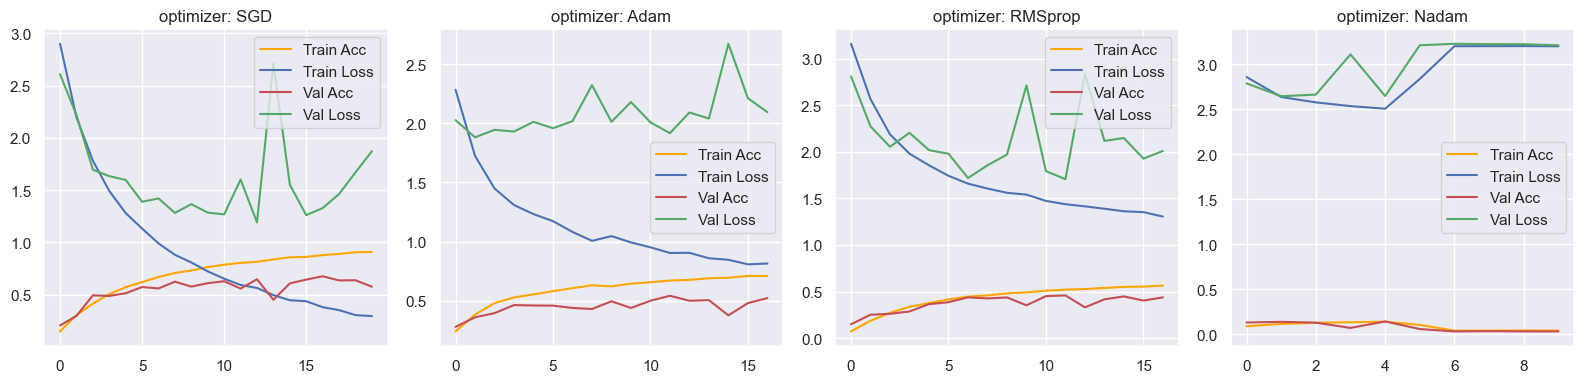

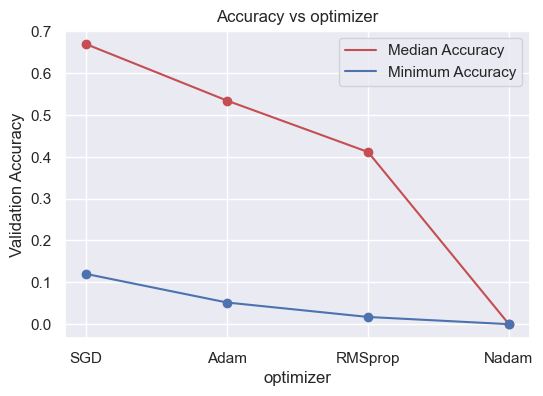

The highest median accuracy is 66.90% with optimizer = SGD.
The highest minimum accuracy is 12.00% with optimizer = SGD.


In [32]:
set_seed(seed=27)
# the best learning rate 0.01 is the same with the baseline 
# Try different optimizer
optimizers = [
    (keras.optimizers.legacy.SGD, 'SGD'),
    (keras.optimizers.legacy.Adam, 'Adam'),
    (keras.optimizers.legacy.RMSprop, 'RMSprop'),
    (keras.optimizers.legacy.Nadam, 'Nadam')
]
# train and display the optimizer optimisation results
optimizer_results = optimize_parameter('optimizer', optimizers, model_dense_factory, X_train, y_train, X_valid, y_valid, 
                                       hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size)


I choose SGD as the best optimizer for the DNN model. Its accuracy-loss plot shows a tendency to converge. However, in the later stages, there are some fluctuations in validation loss, which begins to increase, indicating a potential risk of overfitting.

#### 2.1.3 Hiddensizes optimisation

45/45 [==============================] - 0s 295us/step
Total params: 17880, hiddensizes: [16, 32, 16], actfn: elu, optimizer: SGD, learning rate: 0.01, batch size: 32
hiddensizes: [16, 32, 16], Unbiased Median Accuracy: 66.90%, Lowest Accuracy: 12.00%
45/45 [==============================] - 0s 916us/step
Total params: 200216, hiddensizes: [128, 256, 128], actfn: elu, optimizer: SGD, learning rate: 0.01, batch size: 32
hiddensizes: [128, 256, 128], Unbiased Median Accuracy: 80.54%, Lowest Accuracy: 43.48%
45/45 [==============================] - 0s 423us/step
Total params: 158840, hiddensizes: [128, 128, 64, 32], actfn: elu, optimizer: SGD, learning rate: 0.01, batch size: 32
hiddensizes: [128, 128, 64, 32], Unbiased Median Accuracy: 79.36%, Lowest Accuracy: 50.00%
45/45 [==============================] - 0s 534us/step
Total params: 306424, hiddensizes: [256, 128, 64, 32], actfn: elu, optimizer: SGD, learning rate: 0.01, batch size: 32
hiddensizes: [256, 128, 64, 32], Unbiased Median A

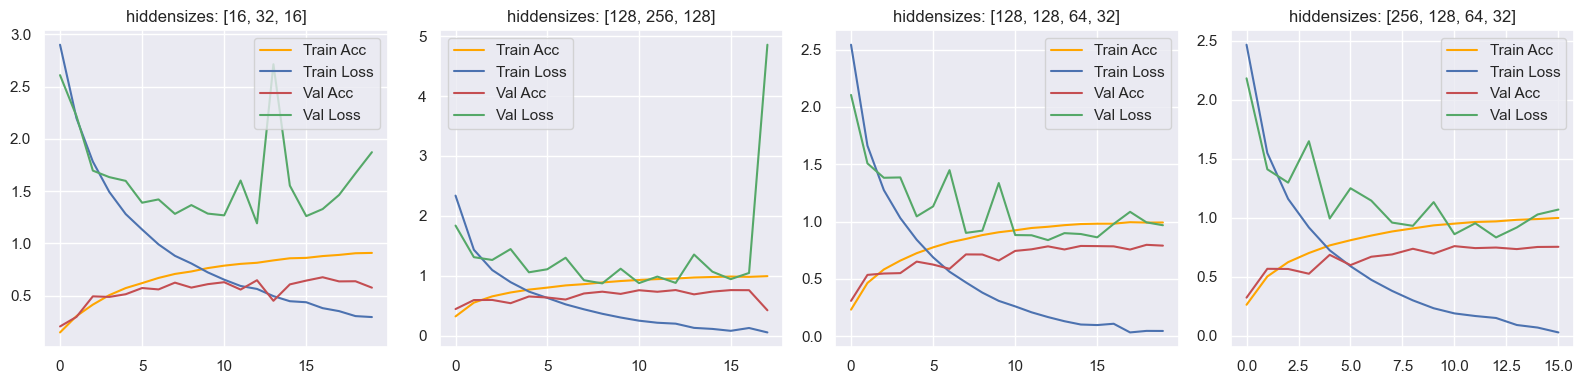

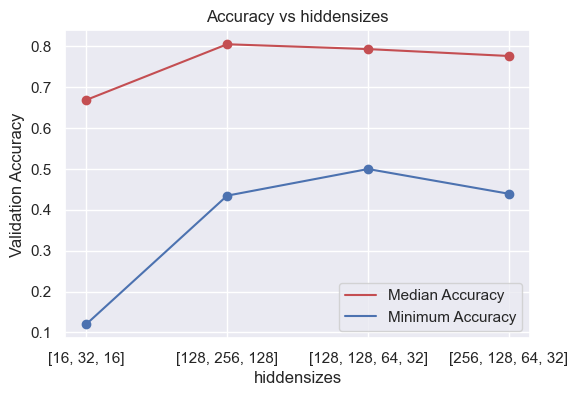

The highest median accuracy is 80.54% with hiddensizes = [128, 256, 128].
The highest minimum accuracy is 50.00% with hiddensizes = [128, 128, 64, 32].


In [33]:
set_seed(seed=27)
# the best optimizer SGD is the same with the baseline 
# try different hiddensizes
hidden_sizes = [[16, 32, 16], [128, 256, 128], [128, 128, 64, 32], [256, 128, 64, 32]]
# train and display the hiddensizes optimisation results
hs_results = optimize_parameter('hiddensizes', hidden_sizes, model_dense_factory, X_train, y_train, X_valid, y_valid, 
                                hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size)


I choose [128, 128, 64, 32] as the best hiddensizes for the DNN model, because it resulted in the highest minimum individual accuracy. And its accuracy-loss plot shows a tendency to converge.

#### 2.1.4 Numbers of hidden layers optimisation

45/45 [==============================] - 0s 323us/step
Total params: 134296, hiddensizes: [128], actfn: elu, optimizer: SGD, learning rate: 0.01, batch size: 32
number of hidden layers: 1, Unbiased Median Accuracy: 76.72%, Lowest Accuracy: 20.41%
45/45 [==============================] - 0s 364us/step
Total params: 150808, hiddensizes: [128, 128], actfn: elu, optimizer: SGD, learning rate: 0.01, batch size: 32
number of hidden layers: 2, Unbiased Median Accuracy: 77.98%, Lowest Accuracy: 34.18%
45/45 [==============================] - 0s 393us/step
Total params: 157528, hiddensizes: [128, 128, 64], actfn: elu, optimizer: SGD, learning rate: 0.01, batch size: 32
number of hidden layers: 3, Unbiased Median Accuracy: 79.44%, Lowest Accuracy: 39.39%
45/45 [==============================] - 0s 413us/step
Total params: 158840, hiddensizes: [128, 128, 64, 32], actfn: elu, optimizer: SGD, learning rate: 0.01, batch size: 32
number of hidden layers: 4, Unbiased Median Accuracy: 80.79%, Lowest Ac

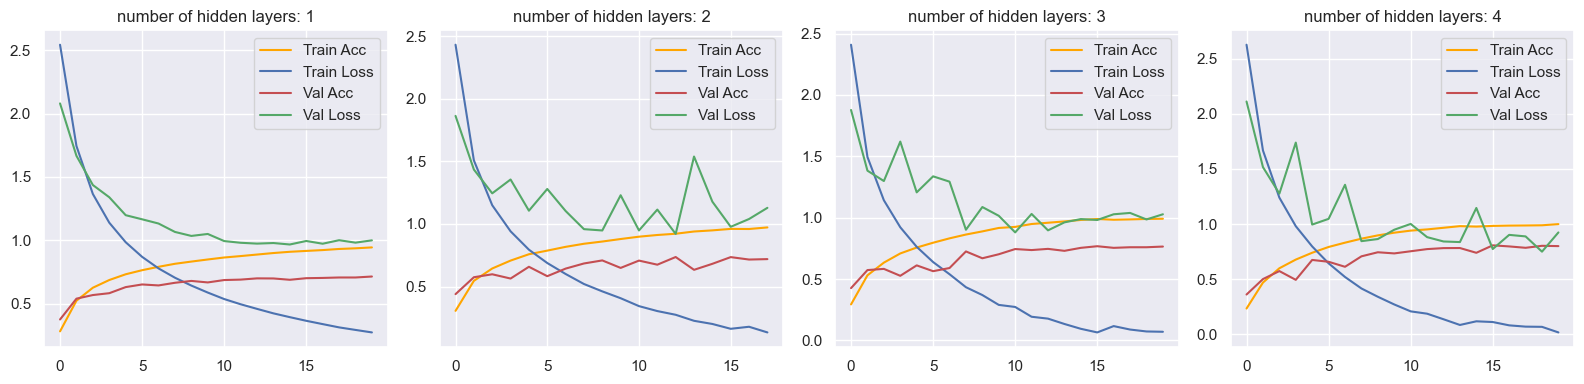

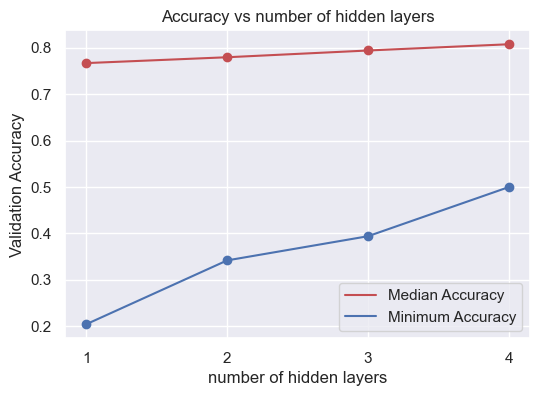

The highest median accuracy is 80.79% with number of hidden layers = 4.
The highest minimum accuracy is 50.00% with number of hidden layers = 4.


In [34]:
set_seed(seed=27)
# update the best hiddensizes
original_hiddensizes = [128, 128, 64, 32]
# try different number of hidden layers
num_hs = [1,2,3,4]
# train and display the number of hidden layers optimisation results
n_results = optimize_parameter('number of hidden layers', num_hs, model_dense_factory, X_train, y_train, X_valid, y_valid, 
                                hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size)

I choose 4 as the best number of Hidden layers for the DNN model.

#### 2.1.5 Batch size optimisation

45/45 [==============================] - 0s 677us/step
Total params: 158840, hiddensizes: [128, 128, 64, 32], actfn: elu, optimizer: SGD, learning rate: 0.01, batch size: 16
batch_size: 16, Unbiased Median Accuracy: 84.64%, Lowest Accuracy: 38.78%
45/45 [==============================] - 0s 1ms/step
Total params: 158840, hiddensizes: [128, 128, 64, 32], actfn: elu, optimizer: SGD, learning rate: 0.01, batch size: 32
batch_size: 32, Unbiased Median Accuracy: 76.64%, Lowest Accuracy: 40.82%
45/45 [==============================] - 0s 967us/step
Total params: 158840, hiddensizes: [128, 128, 64, 32], actfn: elu, optimizer: SGD, learning rate: 0.01, batch size: 64
batch_size: 64, Unbiased Median Accuracy: 74.14%, Lowest Accuracy: 21.21%
45/45 [==============================] - 0s 693us/step
Total params: 158840, hiddensizes: [128, 128, 64, 32], actfn: elu, optimizer: SGD, learning rate: 0.01, batch size: 128
batch_size: 128, Unbiased Median Accuracy: 74.03%, Lowest Accuracy: 10.61%


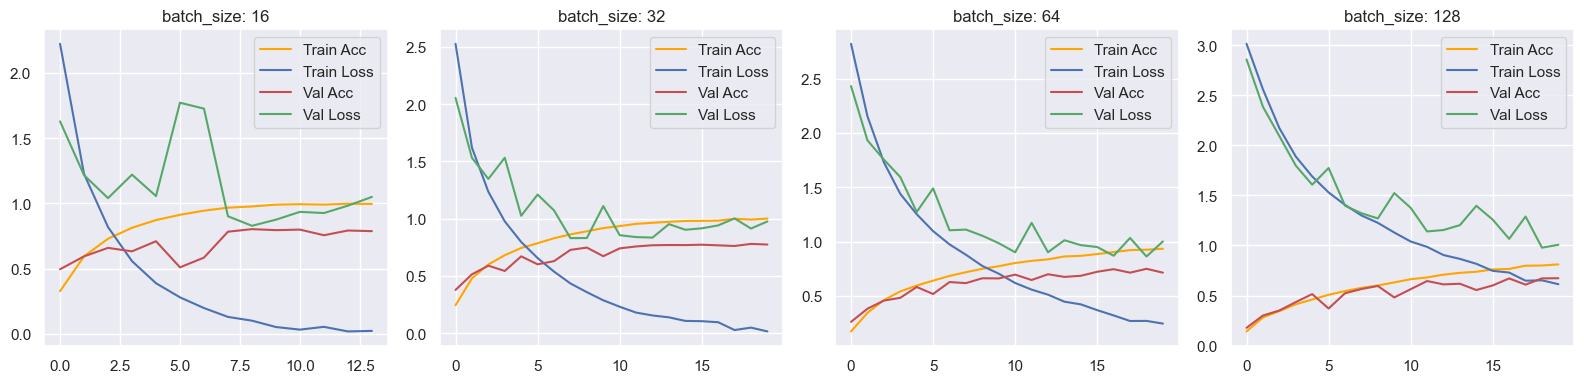

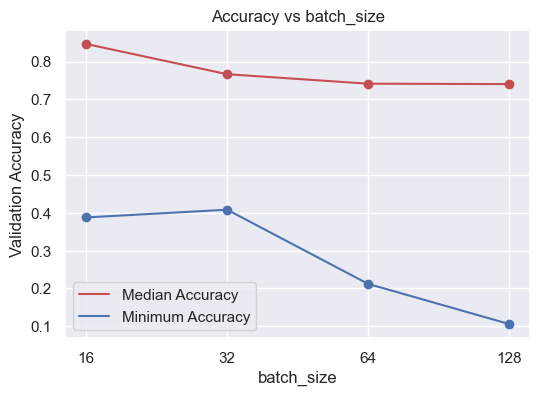

The highest median accuracy is 84.64% with batch_size = 16.
The highest minimum accuracy is 40.82% with batch_size = 32.


In [35]:
set_seed(seed=27)
# the best number of hidden layers is the same with the baseline 
# try different batch sizes
batch_sizes = [16, 32, 64, 128]
# train and display the batch size optimisation results
bs_results = optimize_parameter('batch_size', batch_sizes, model_dense_factory, X_train, y_train, X_valid, y_valid, 
                                hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size)

I choose 32 as the best number of Hidden layers for the DNN model, because it resulted in the highest minimum individual accuracy. And its accuracy-loss plot shows a tendency to converge, only with some fluctuations in validation loss.

#### 2.1.6 Activation function optimisation

45/45 [==============================] - 0s 402us/step
Total params: 158840, hiddensizes: [128, 128, 64, 32], actfn: elu, optimizer: SGD, learning rate: 0.01, batch size: 32
actfn: elu, Unbiased Median Accuracy: 82.90%, Lowest Accuracy: 40.82%
45/45 [==============================] - 0s 359us/step
Total params: 158840, hiddensizes: [128, 128, 64, 32], actfn: relu, optimizer: SGD, learning rate: 0.01, batch size: 32
actfn: relu, Unbiased Median Accuracy: 75.78%, Lowest Accuracy: 37.88%


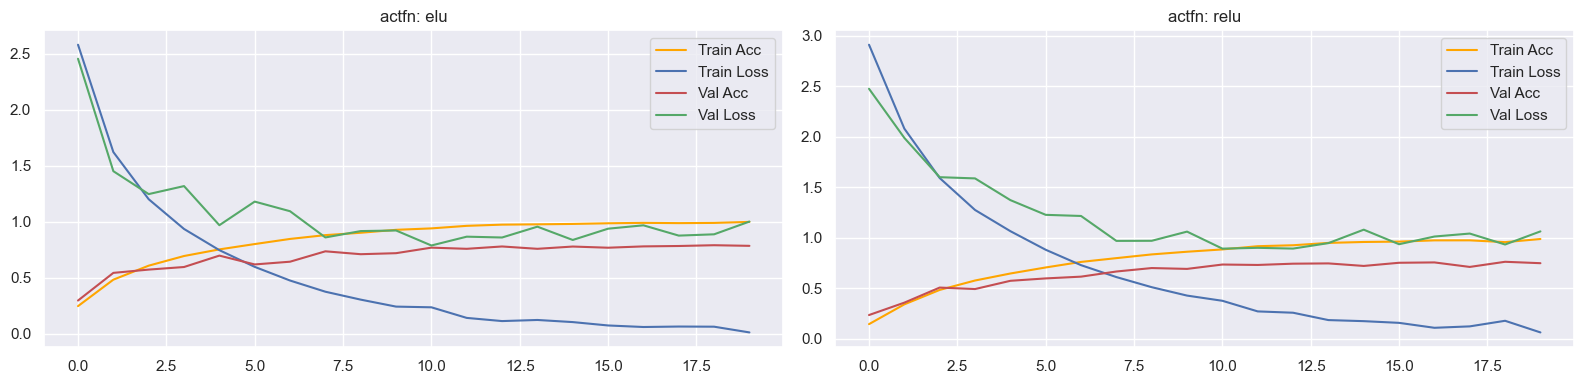

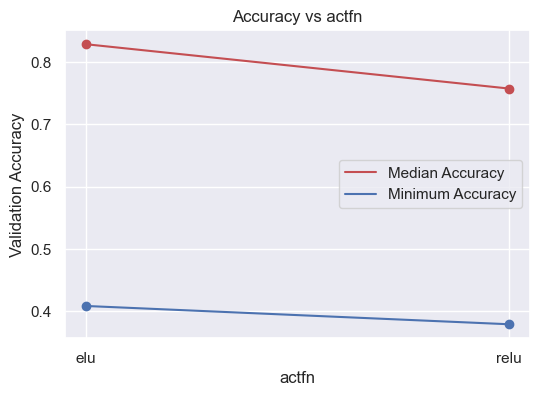

The highest median accuracy is 82.90% with actfn = elu.
The highest minimum accuracy is 40.82% with actfn = elu.


In [36]:
set_seed(seed=27)
# the best batch size is the same with the baseline 
# try different activation functions
activation_functions = ['elu', 'relu']
# train and display the activation optimisation results
af_results = optimize_parameter('actfn', activation_functions, model_dense_factory, X_train, y_train, X_valid, y_valid, 
                                hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size)

I choose elu as the best activation function for the DNN model.

#### 2.1.7 Conclusion
After 22 rounds of hyperparameter tuning, I selected the best hyperparameters for the DNN model: Learning rate is 0.01, optimizer is SGD, hiddensizes is [128, 128, 64, 32], number of hidden layers is 4, batch size is 32, activation function is elu.

### 2.2 CNN model optimisation

In [37]:
# Set the parameters for the CNN model
original_hiddensizes = [16, 32, 16] 
actfn = "relu" 
optimizer = keras.optimizers.legacy.SGD 
learning_rate = 0.1 
batch_size = 32 

In [38]:
# Implement a simple CNN model
# I used Dropout layers, Batch Normalization, and early stopping to address overfitting
def model_cnn_update(hiddensizes, actfn, optimizer, learningrate=0):
    model = keras.models.Sequential()
    
    # First convolutional layer
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same",
                                  input_shape=[32, 32, 1]))  
    model.add(keras.layers.BatchNormalization()) # Add Batch Normalization
    model.add(keras.layers.MaxPooling2D(pool_size=2))
    model.add(keras.layers.Dropout(0.25)) # Add Dropout 
    
    # Middle convolutional layers
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn))
        model.add(keras.layers.BatchNormalization()) # Add Batch Normalization
        model.add(keras.layers.MaxPooling2D(pool_size=2))  
        model.add(keras.layers.Dropout(0.25)) # Add Dropout
     
    # Last convolutional layer
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation=actfn)) 
    model.add(keras.layers.Flatten())
    model.add(keras.layers.BatchNormalization()) # Add Batch Normalization
    model.add(keras.layers.Dropout(0.5))  # Add Dropout
    
    # Output layer
    model.add(keras.layers.Dense(24, activation = "softmax"))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

hiddensizes: [16, 32, 16], actfn: relu, optimizer: SGD, lr: 0.1, batch_size: 32
45/45 [==============================] - 0s 3ms/step
Model Total Parameters: 38312
Unbiased median accuracy: 100.00%
Highest individual accuracy: Letter A with accuracy 100.00%
Lowest individual accuracy: Letter N with accuracy 84.48%
Three most common types of errors:
  - 'N' was incorrectly classified as 'M' with a proportion of 0.155
  - 'Y' was incorrectly classified as 'V' with a proportion of 0.121
  - 'M' was incorrectly classified as 'N' with a proportion of 0.114
Overall mean accuracy: 96.20%
Individual accuracies: A: 100.00%, B: 91.95%, C: 100.00%, D: 100.00%, E: 100.00%, F: 100.00%, G: 100.00%, H: 94.25%, I: 94.83%, K: 93.94%, L: 100.00%, M: 88.61%, N: 84.48%, O: 100.00%, P: 100.00%, Q: 100.00%, R: 100.00%, S: 93.88%, T: 92.00%, U: 94.34%, V: 92.75%, W: 100.00%, X: 100.00%, Y: 87.88%


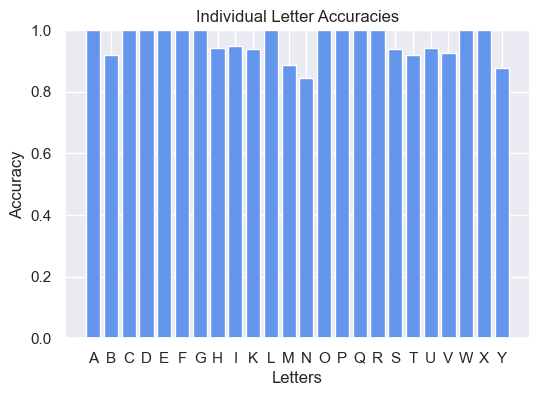

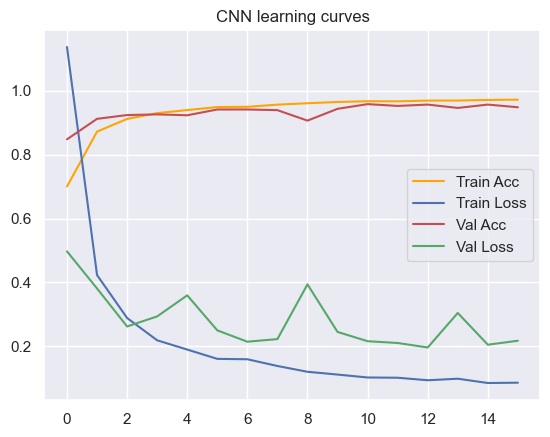

In [39]:
# Set seed for reproducibility
set_seed(seed=27)

# Train and evaluate the default CNN model
unbiased_median_acc_cnn, min_acc_cnn, history_cnn, model_cnn = do_all(hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size, model_cnn_update, X_valid, y_valid)

# Plot learning curves for CNN model
plot_history(history_cnn, "CNN learning curves")

#### 2.2.1 Learning rate optimisation

45/45 [==============================] - 0s 4ms/step
Total params: 38312, hiddensizes: [16, 32, 16], actfn: relu, optimizer: SGD, learning rate: 1.0, batch size: 32
learning_rate: 1.0, Unbiased Median Accuracy: 74.12%, Lowest Accuracy: 0.00%
45/45 [==============================] - 0s 5ms/step
Total params: 38312, hiddensizes: [16, 32, 16], actfn: relu, optimizer: SGD, learning rate: 0.1, batch size: 32
learning_rate: 0.1, Unbiased Median Accuracy: 100.00%, Lowest Accuracy: 70.00%
45/45 [==============================] - 0s 4ms/step
Total params: 38312, hiddensizes: [16, 32, 16], actfn: relu, optimizer: SGD, learning rate: 0.01, batch size: 32
learning_rate: 0.01, Unbiased Median Accuracy: 97.67%, Lowest Accuracy: 58.00%
45/45 [==============================] - 0s 4ms/step
Total params: 38312, hiddensizes: [16, 32, 16], actfn: relu, optimizer: SGD, learning rate: 0.001, batch size: 32
learning_rate: 0.001, Unbiased Median Accuracy: 91.05%, Lowest Accuracy: 54.00%


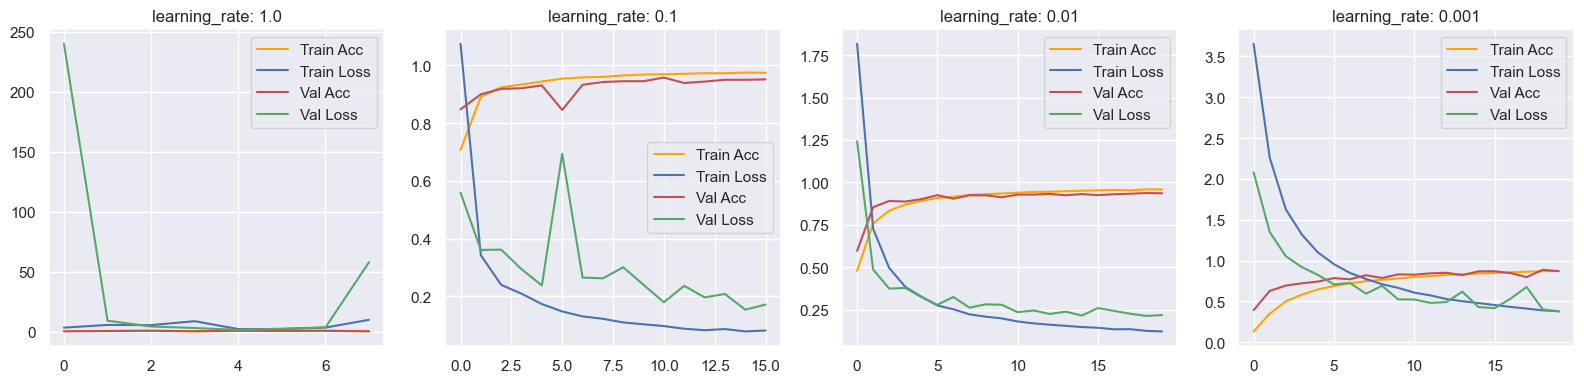

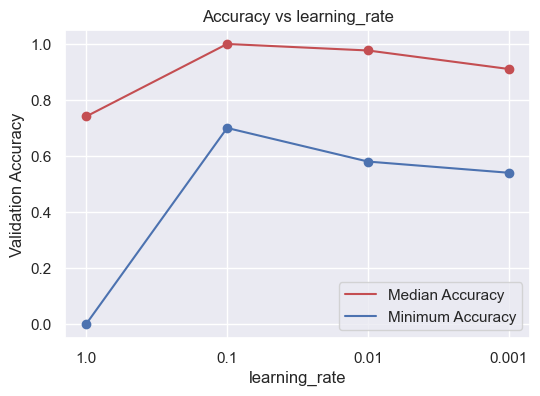

The highest median accuracy is 100.00% with learning_rate = 0.1.
The highest minimum accuracy is 70.00% with learning_rate = 0.1.


In [40]:
set_seed(seed=27)
# try different learning rates
learning_rates = [1.0, 0.1, 0.01, 0.001]
# train and display the learning rate optimisation results
lr_results = optimize_parameter('learning_rate', learning_rates, model_cnn_update, X_train, y_train, X_valid, y_valid, 
                                hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size)

I choose 0.1 as the best learning rate for the CNN model.

#### 2.2.2 Optimizer optimisation

45/45 [==============================] - 0s 3ms/step
Total params: 38312, hiddensizes: [16, 32, 16], actfn: relu, optimizer: SGD, learning rate: 0.1, batch size: 32
optimizer: SGD, Unbiased Median Accuracy: 100.00%, Lowest Accuracy: 84.48%
45/45 [==============================] - 0s 3ms/step
Total params: 38312, hiddensizes: [16, 32, 16], actfn: relu, optimizer: Adam, learning rate: 0.1, batch size: 32
optimizer: Adam, Unbiased Median Accuracy: 99.29%, Lowest Accuracy: 62.00%
45/45 [==============================] - 0s 3ms/step
Total params: 38312, hiddensizes: [16, 32, 16], actfn: relu, optimizer: RMSprop, learning rate: 0.1, batch size: 32
optimizer: RMSprop, Unbiased Median Accuracy: 97.68%, Lowest Accuracy: 68.29%
45/45 [==============================] - 0s 3ms/step
Total params: 38312, hiddensizes: [16, 32, 16], actfn: relu, optimizer: Nadam, learning rate: 0.1, batch size: 32
optimizer: Nadam, Unbiased Median Accuracy: 93.53%, Lowest Accuracy: 41.38%


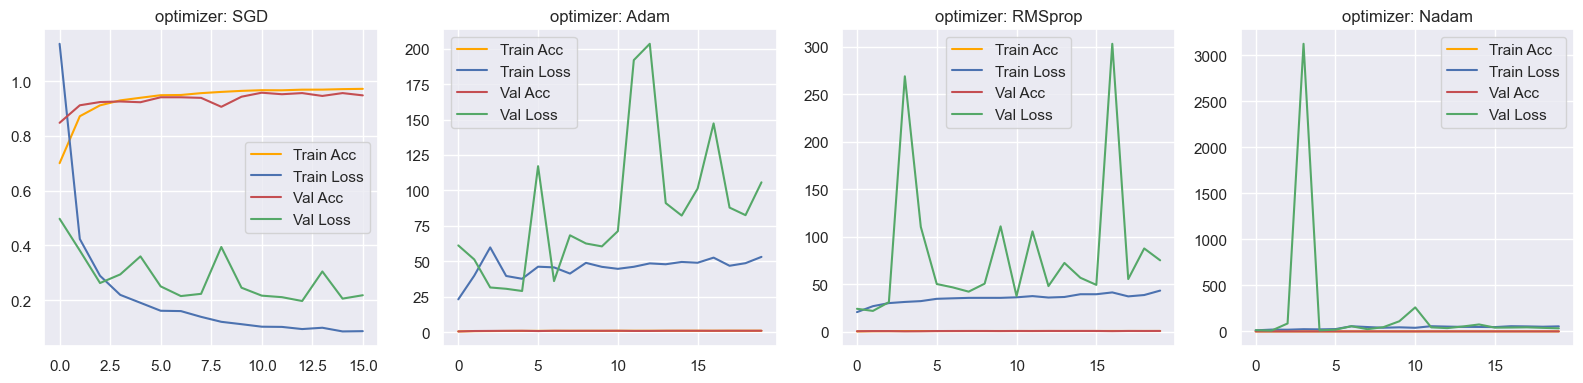

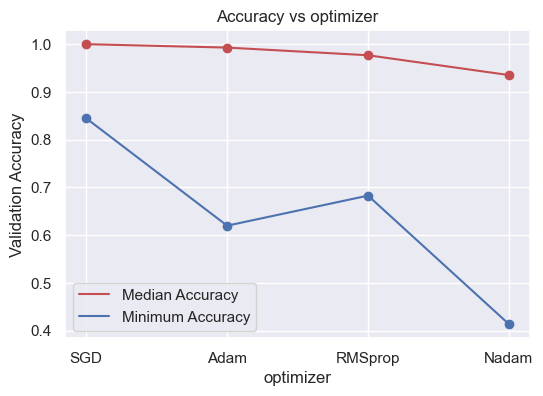

The highest median accuracy is 100.00% with optimizer = SGD.
The highest minimum accuracy is 84.48% with optimizer = SGD.


In [41]:
set_seed(seed=27)
# update the best learning rate
learning_rate = 0.1
# try different optimizers
optimizers = [
    (keras.optimizers.legacy.SGD, 'SGD'),
    (keras.optimizers.legacy.Adam, 'Adam'),
    (keras.optimizers.legacy.RMSprop, 'RMSprop'),
    (keras.optimizers.legacy.Nadam, 'Nadam')
]
optimizer_results = optimize_parameter('optimizer', optimizers, model_cnn_update, X_train, y_train, X_valid, y_valid, 
                                       hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size)


I choose SGD as the best optimizer for the CNN model.

#### 2.2.3 Hiddensizes optimisation

45/45 [==============================] - 0s 3ms/step
Total params: 38312, hiddensizes: [16, 32, 16], actfn: relu, optimizer: SGD, learning rate: 0.1, batch size: 32
hiddensizes: [16, 32, 16], Unbiased Median Accuracy: 100.00%, Lowest Accuracy: 84.48%
45/45 [==============================] - 0s 6ms/step
Total params: 138200, hiddensizes: [16, 32, 64], actfn: relu, optimizer: SGD, learning rate: 0.1, batch size: 32
hiddensizes: [16, 32, 64], Unbiased Median Accuracy: 85.06%, Lowest Accuracy: 50.00%
45/45 [==============================] - 0s 7ms/step
Total params: 95032, hiddensizes: [32, 64, 32], actfn: relu, optimizer: SGD, learning rate: 0.1, batch size: 32
hiddensizes: [32, 64, 32], Unbiased Median Accuracy: 98.98%, Lowest Accuracy: 62.00%
45/45 [==============================] - 0s 4ms/step
Total params: 56568, hiddensizes: [16, 32, 64, 32], actfn: relu, optimizer: SGD, learning rate: 0.1, batch size: 32
hiddensizes: [16, 32, 64, 32], Unbiased Median Accuracy: 100.00%, Lowest Accura

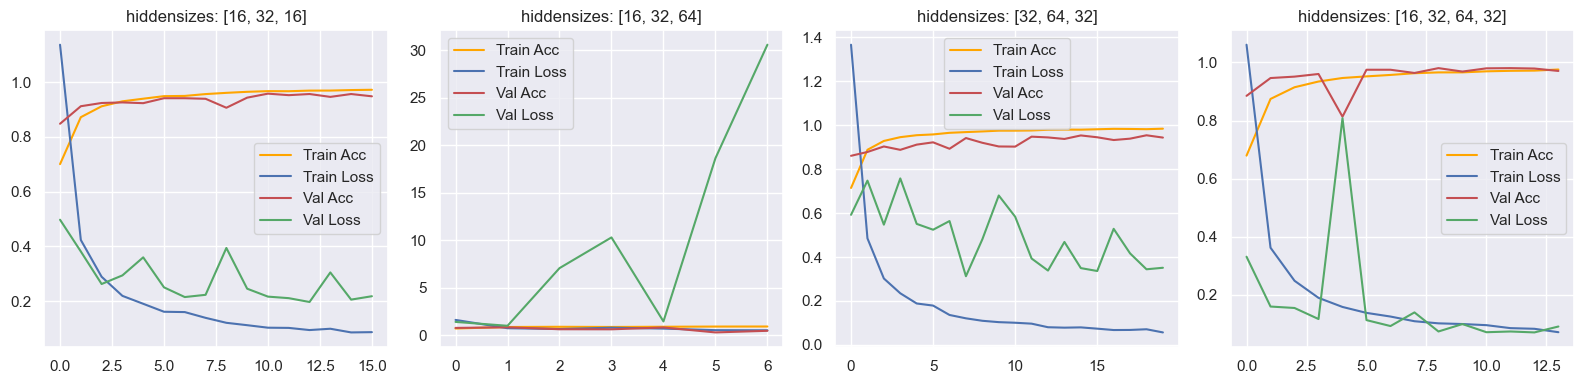

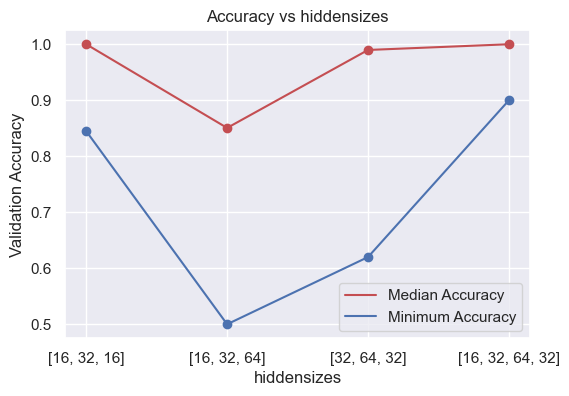

The highest median accuracy is 100.00% with hiddensizes = [16, 32, 16].
The highest minimum accuracy is 90.00% with hiddensizes = [16, 32, 64, 32].


In [42]:
set_seed(seed=27)
# the best optimizer is the same with the baseline 
# try different hiddensizes
hidden_sizes = [[16, 32, 16], [16, 32, 64], [32, 64, 32], [16, 32, 64, 32]]
# train and display the hiddensizes optimisation results
hs_results = optimize_parameter('hiddensizes', hidden_sizes, model_cnn_update, X_train, y_train, X_valid, y_valid, 
                                hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size)


I choose [16, 32, 64, 32] as the best hiddensizes for the CNN model.

#### 2.2.4 Number of hidden layers optimisation

45/45 [==============================] - 0s 2ms/step
Total params: 117256, hiddensizes: [16], actfn: relu, optimizer: SGD, learning rate: 0.1, batch size: 32
number of hidden layers: 1, Unbiased Median Accuracy: 90.15%, Lowest Accuracy: 50.00%
45/45 [==============================] - 0s 2ms/step
Total params: 234264, hiddensizes: [16, 32], actfn: relu, optimizer: SGD, learning rate: 0.1, batch size: 32
number of hidden layers: 2, Unbiased Median Accuracy: 92.65%, Lowest Accuracy: 55.17%
45/45 [==============================] - 0s 3ms/step
Total params: 138200, hiddensizes: [16, 32, 64], actfn: relu, optimizer: SGD, learning rate: 0.1, batch size: 32
number of hidden layers: 3, Unbiased Median Accuracy: 95.82%, Lowest Accuracy: 54.00%
45/45 [==============================] - 0s 3ms/step
Total params: 56568, hiddensizes: [16, 32, 64, 32], actfn: relu, optimizer: SGD, learning rate: 0.1, batch size: 32
number of hidden layers: 4, Unbiased Median Accuracy: 100.00%, Lowest Accuracy: 76.00%


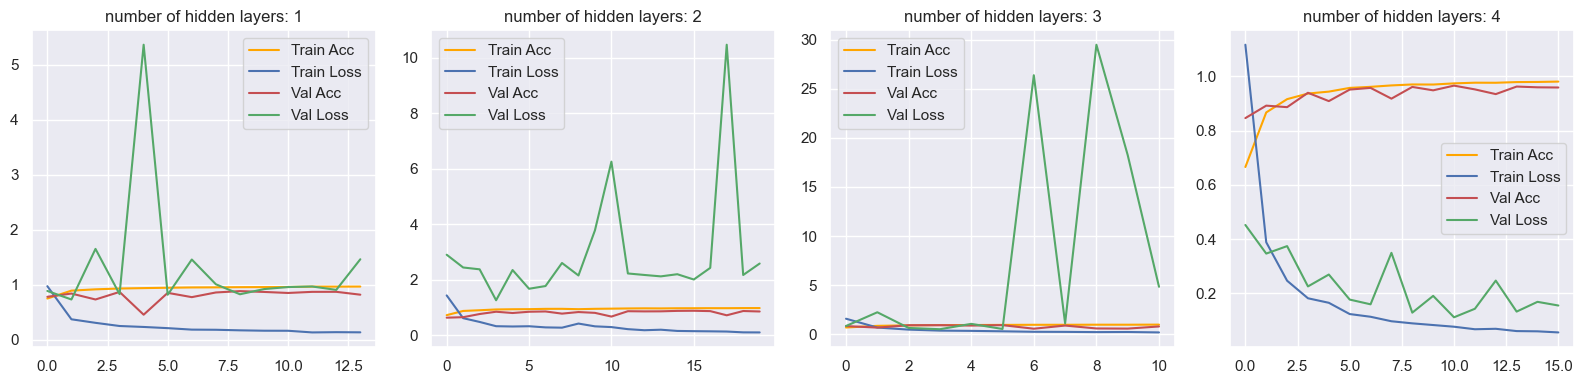

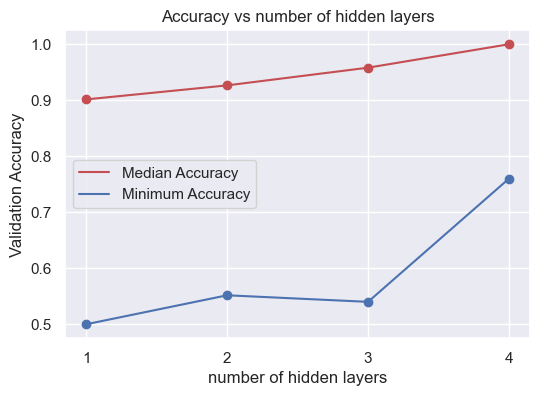

The highest median accuracy is 100.00% with number of hidden layers = 4.
The highest minimum accuracy is 76.00% with number of hidden layers = 4.


In [43]:
set_seed(seed=27)
# update the best hiddensize
original_hiddensizes = [16, 32, 64, 32]
# try different number of hidden layers
num_hs = [1,2,3,4]
# train and display the number of hidden layers optimisation results
n_results = optimize_parameter('number of hidden layers', num_hs, model_cnn_update, X_train, y_train, X_valid, y_valid, 
                                hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size)

I choose 4 as the best number of Hidden layers for the CNN model.

#### 2.2.5 Batch size optimisation

45/45 [==============================] - 0s 3ms/step
Total params: 56568, hiddensizes: [16, 32, 64, 32], actfn: relu, optimizer: SGD, learning rate: 0.1, batch size: 16
batch_size: 16, Unbiased Median Accuracy: 100.00%, Lowest Accuracy: 90.00%
45/45 [==============================] - 0s 3ms/step
Total params: 56568, hiddensizes: [16, 32, 64, 32], actfn: relu, optimizer: SGD, learning rate: 0.1, batch size: 32
batch_size: 32, Unbiased Median Accuracy: 100.00%, Lowest Accuracy: 84.00%
45/45 [==============================] - 0s 4ms/step
Total params: 56568, hiddensizes: [16, 32, 64, 32], actfn: relu, optimizer: SGD, learning rate: 0.1, batch size: 64
batch_size: 64, Unbiased Median Accuracy: 94.07%, Lowest Accuracy: 64.15%
45/45 [==============================] - 0s 4ms/step
Total params: 56568, hiddensizes: [16, 32, 64, 32], actfn: relu, optimizer: SGD, learning rate: 0.1, batch size: 128
batch_size: 128, Unbiased Median Accuracy: 100.00%, Lowest Accuracy: 56.00%


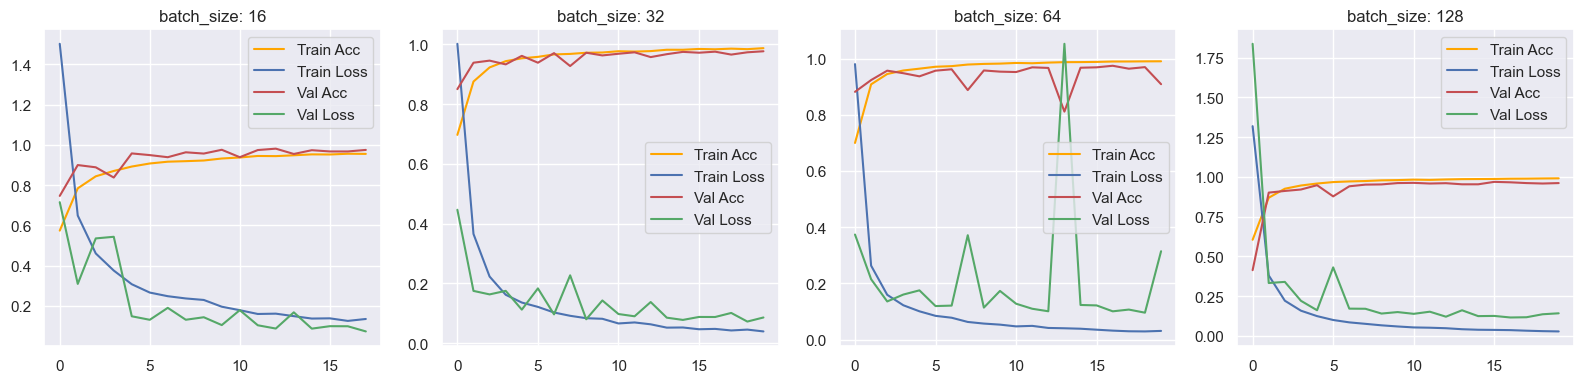

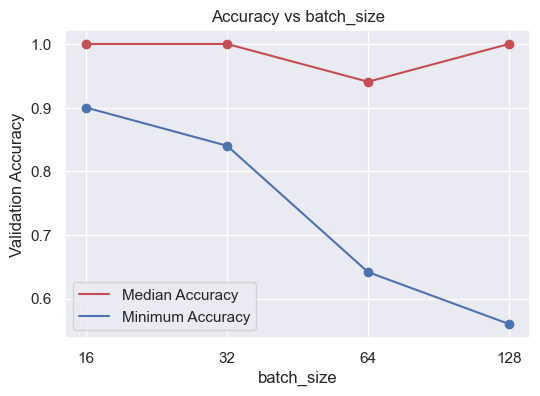

The highest median accuracy is 100.00% with batch_size = 16.
The highest minimum accuracy is 90.00% with batch_size = 16.


In [44]:
set_seed(seed=27)
# the best number of hidden layers is the same with the baseline 
# try different batch sizes
batch_sizes = [16, 32, 64, 128]
# train and display the batch size optimisation results
bs_results = optimize_parameter('batch_size', batch_sizes, model_cnn_update, X_train, y_train, X_valid, y_valid, 
                                hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size)


I choose 16 as the best number of Batch size for the CNN model.

#### 2.2.6 Activation function optimisation

45/45 [==============================] - 0s 5ms/step
Total params: 56568, hiddensizes: [16, 32, 64, 32], actfn: elu, optimizer: SGD, learning rate: 0.1, batch size: 16
actfn: elu, Unbiased Median Accuracy: 100.00%, Lowest Accuracy: 82.00%
45/45 [==============================] - 0s 5ms/step
Total params: 56568, hiddensizes: [16, 32, 64, 32], actfn: relu, optimizer: SGD, learning rate: 0.1, batch size: 16
actfn: relu, Unbiased Median Accuracy: 100.00%, Lowest Accuracy: 78.00%


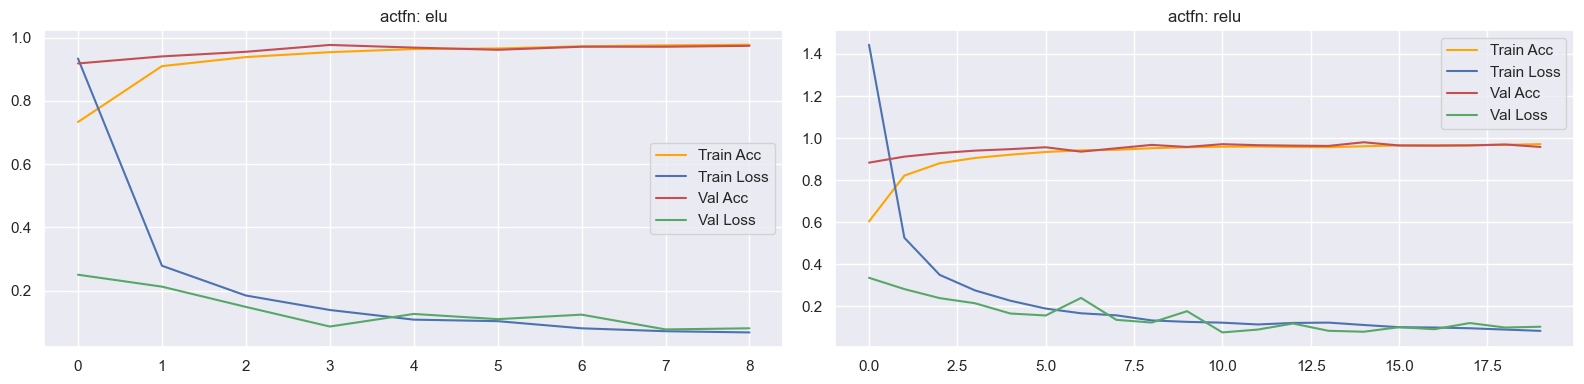

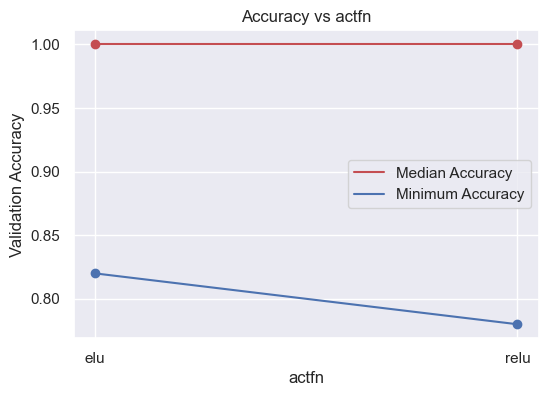

The highest median accuracy is 100.00% with actfn = elu.
The highest minimum accuracy is 82.00% with actfn = elu.


In [45]:
set_seed(seed=27)
# the best batch size is the same with the baseline 
# update the best batch size
batch_size = 16
# try different activation functions
activation_functions = ['elu', 'relu']
# train and display the activation optimisation results
af_results = optimize_parameter('actfn', activation_functions, model_cnn_update, X_train, y_train, X_valid, y_valid, 
                                hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size)

I choose elu as the best activation function for the CNN model.

#### 2.2.7 Conclusion

After 22 rounds of hyperparameter tuning, I selected the best hyperparameters for the CNN model:  Learning rate is 0.1, optimizer is SGD, hiddensizes is [16, 32, 64, 32], number of hidden layers is 4, batch size is 16, activation function is elu.



## Part 3. Comparison of models, selection of the single best model and reporting of final results

### 3.1 Compare models

#### 3.1.1 Best DNN Model

hiddensizes: [128, 128, 64, 32], actfn: elu, optimizer: SGD, lr: 0.01, batch_size: 32
45/45 [==============================] - 0s 464us/step
Model Total Parameters: 158840
Unbiased median accuracy: 82.90%
Highest individual accuracy: Letter A with accuracy 100.00%
Lowest individual accuracy: Letter S with accuracy 40.82%
Three most common types of errors:
  - 'S' was incorrectly classified as 'I' with a proportion of 0.265
  - 'U' was incorrectly classified as 'K' with a proportion of 0.208
  - 'T' was incorrectly classified as 'X' with a proportion of 0.200
Overall mean accuracy: 77.19%
Individual accuracies: A: 100.00%, B: 87.36%, C: 88.71%, D: 87.76%, E: 98.00%, F: 85.71%, G: 85.71%, H: 93.10%, I: 87.93%, K: 60.61%, L: 80.95%, M: 70.89%, N: 55.17%, O: 65.31%, P: 95.71%, Q: 84.85%, R: 75.86%, S: 40.82%, T: 56.00%, U: 62.26%, V: 69.57%, W: 68.29%, X: 94.34%, Y: 57.58%


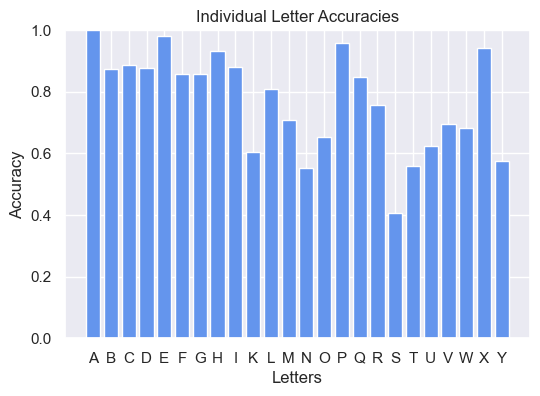

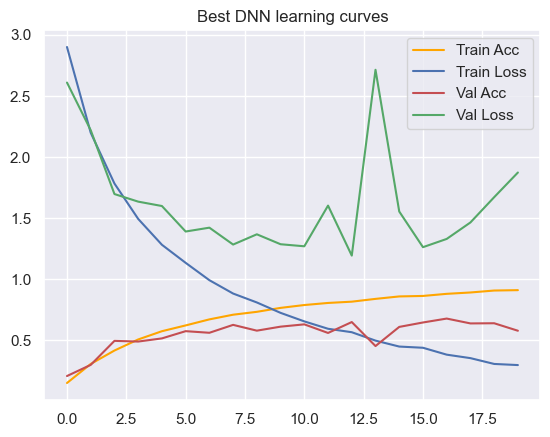

In [46]:
# Apply the best 6 hyperparameter values from Part 2 to the best DNN model
hiddensizes = [128, 128, 64, 32]
actfn = "elu" 
optimizer = keras.optimizers.legacy.SGD
learning_rate = 0.01
batch_size = 32 

# Set seed for reproducibility
set_seed(seed=27)

# Train and evaluate the best DNN model
unbiased_median_acc_best_dnn, min_acc_best_dnn, history_best_dnn, model_best_dnn = do_all(
    hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size, model_dense_factory, X_valid, y_valid)

# Plot training history for the best DNN model
plot_history(history_dnn, "Best DNN learning curves")

The performance of the best DNN model on the validation set is better than the baseline, but it still does not meet the client’s requirements.

#### 3.1.2 Best CNN Model

hiddensizes: [16, 32, 64, 32], actfn: elu, optimizer: SGD, lr: 0.1, batch_size: 16
45/45 [==============================] - 0s 6ms/step
Model Total Parameters: 56568
Unbiased median accuracy: 100.00%
Highest individual accuracy: Letter A with accuracy 100.00%
Lowest individual accuracy: Letter T with accuracy 82.00%
Three most common types of errors:
  - 'T' was incorrectly classified as 'X' with a proportion of 0.120
  - 'R' was incorrectly classified as 'V' with a proportion of 0.103
  - 'K' was incorrectly classified as 'Y' with a proportion of 0.061
Overall mean accuracy: 97.55%
Individual accuracies: A: 100.00%, B: 100.00%, C: 100.00%, D: 100.00%, E: 100.00%, F: 100.00%, G: 94.29%, H: 94.25%, I: 100.00%, K: 93.94%, L: 100.00%, M: 100.00%, N: 100.00%, O: 100.00%, P: 100.00%, Q: 100.00%, R: 89.66%, S: 100.00%, T: 82.00%, U: 100.00%, V: 95.65%, W: 100.00%, X: 94.34%, Y: 96.97%


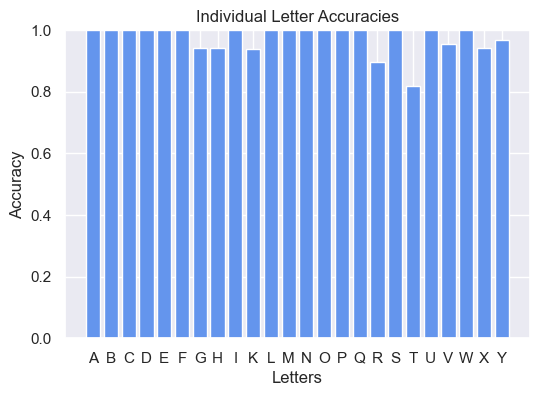

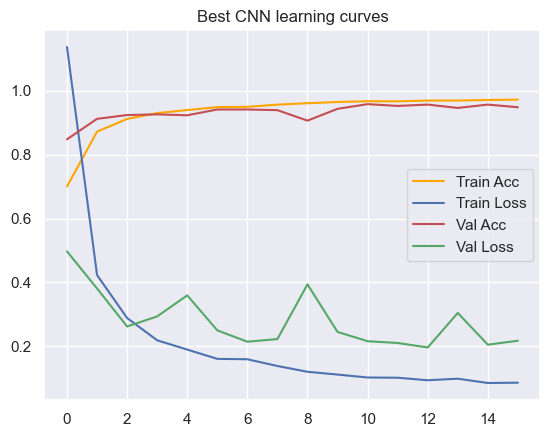

In [47]:
# Apply the best 6 hyperparameter values from Part 2 to the best CNN model
hiddensizes = [16, 32, 64, 32]
actfn = "elu"
optimizer = keras.optimizers.legacy.SGD
learning_rate = 0.1
batch_size = 16 
n_epochs = 20

# Set seed for reproducibility
set_seed(seed=27)

# Train and evaluate the best CNN model
unbiased_median_acc_best_cnn, min_acc_best_cnn, history_best_cnn, best_model_cnn = do_all(
    hiddensizes, actfn, optimizer, learning_rate, n_epochs, batch_size, model_cnn_update, X_valid, y_valid)

# Plot training history 
plot_history(history_cnn, "Best CNN learning curves")

The performance of the best CNN model on the validation set is great, almost meet the client’s requirements. The learning curve indicates that the model is effectively tuned, leading to rapid convergence and stability.

### 3.2 Best model selection
Compare the best DNN model and the best CNN model, we find the best CNN model obviously has better performance: the higher unbiased median accuracy, the higher lowest individual. So I will choose the best CNN model as the best model.

In [48]:
best_model = best_model_cnn

### 3.3 Report final results

180/180 [==============================] - 1s 4ms/step
Model Total Parameters: 56568
Unbiased median accuracy: 100.00%
Highest individual accuracy: Letter A with accuracy 100.00%
Lowest individual accuracy: Letter T with accuracy 81.82%
Three most common types of errors:
  - 'R' was incorrectly classified as 'V' with a proportion of 0.113
  - 'T' was incorrectly classified as 'H' with a proportion of 0.096
  - 'T' was incorrectly classified as 'X' with a proportion of 0.086
Overall mean accuracy: 97.35%
Individual accuracies: A: 100.00%, B: 99.71%, C: 100.00%, D: 100.00%, E: 100.00%, F: 100.00%, G: 94.24%, H: 95.70%, I: 100.00%, K: 93.21%, L: 100.00%, M: 100.00%, N: 99.57%, O: 100.00%, P: 100.00%, Q: 100.00%, R: 88.70%, S: 100.00%, T: 81.82%, U: 100.00%, V: 97.83%, W: 100.00%, X: 91.59%, Y: 93.98%


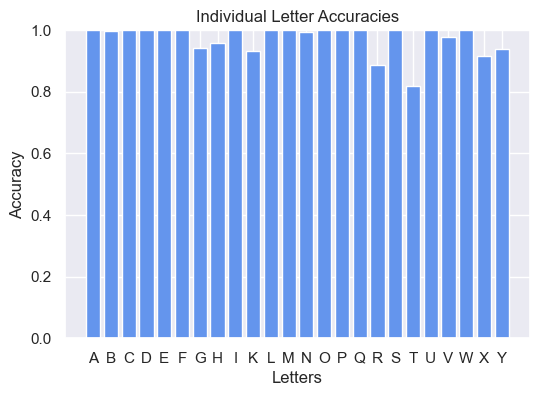

In [50]:
# Check the best model performance on test set
best_model_performance = evaluate_model(best_model, X_test, y_test)

Based on test set results, the model does not fully meet the client’s requirements. However, it is very close:  only the letter 'T' accuracy (81.82%) slightly below the 85% target. All other letters meet requirements, with overall mean accuracy (97.35%) and unbiased median accuracy (100%) surpassing the 94% threshold. It shows high accuracy in translating American sign language. I think that with a small amount of model optimisation , such as increasing the training data for the letter 'T', the model can achieve the client’s accuracy goals.